<a href="https://colab.research.google.com/github/romanowiczadam/data-sb/blob/master/kurs_datascience/04_podstawy_sklearn/04_Regresja_liniowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.1.Wprowadzenie

In [0]:
import sklearn
sklearn.__version__

'0.22.2.post1'


Regresja Liniowa - wprowadzenie¶
Zdefiniujmy:

$X_1, X_2, ..., X_n$ - zmienne niezależne (nasze dane do modelu)
$Y$ - zmienna docelowa
$y_{true}$ - wartość rzeczywista
$y_{pred}$ - wartość przewidziana przez model
$w_0, w_1,...,w_n$ - wagi do modelu (podlegaja uczeniu)
W tym modelu zakłada się. ze wartość przewidywana $y_{pred}$ może być liniową kombinacją zmiennych niezależnych. Ogólna postac modelu:

$$y_{pred}(W, X) = w_0 + w_1X_1 + ... + w_nX_n$$$$Y = XW$$

gdzie:

$X = \begin{pmatrix} 1  X_1  X_2  \dots X_n\end{pmatrix}$, $W = \begin{pmatrix} w_{0} \\  w_{1}  \\ \dots \\ w_{n}\end{pmatrix}$

Wprowadźmy oznaczenia:

$w = (w_1,...w_n)$ jako coef_
$w_0$ jako intercept_
Regresja Liniowa polega na takim dopasowaniu wag $w_0, w_1,...,w_n$ by zminimalizować funkcję kosztu(cost function):

$$||XW-Y||_{2}^{2} \rightarrow min$$
Przykład w $R^2$:
$Y=w_0 + w_1X_1$

Przykład w $R^3$:
$Y=w_0 + w_1X_1 + w_2X_2$

Podstawowe założenia regresji liniowej
-mamy zależność liniową
-wariancja reszt jest taka sama dla wszystkich obserwacji
-brak współliniowości (żaden z predyktorów nie stanowi kombinacji liniowej innych predyktorów)

In [0]:
import numpy as np

X = np.arange(0, 50, 0.5)
print(X)
print(X.shape)
noise = 10 * np.random.randn(100)
y = 2 * X + 100 + noise
X = X.reshape(-1, 1)
print(X)
print('-----------------')
print(y)

[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10.  10.5 11.  11.5 12.  12.5 13.  13.5
 14.  14.5 15.  15.5 16.  16.5 17.  17.5 18.  18.5 19.  19.5 20.  20.5
 21.  21.5 22.  22.5 23.  23.5 24.  24.5 25.  25.5 26.  26.5 27.  27.5
 28.  28.5 29.  29.5 30.  30.5 31.  31.5 32.  32.5 33.  33.5 34.  34.5
 35.  35.5 36.  36.5 37.  37.5 38.  38.5 39.  39.5 40.  40.5 41.  41.5
 42.  42.5 43.  43.5 44.  44.5 45.  45.5 46.  46.5 47.  47.5 48.  48.5
 49.  49.5]
(100,)
[[ 0. ]
 [ 0.5]
 [ 1. ]
 [ 1.5]
 [ 2. ]
 [ 2.5]
 [ 3. ]
 [ 3.5]
 [ 4. ]
 [ 4.5]
 [ 5. ]
 [ 5.5]
 [ 6. ]
 [ 6.5]
 [ 7. ]
 [ 7.5]
 [ 8. ]
 [ 8.5]
 [ 9. ]
 [ 9.5]
 [10. ]
 [10.5]
 [11. ]
 [11.5]
 [12. ]
 [12.5]
 [13. ]
 [13.5]
 [14. ]
 [14.5]
 [15. ]
 [15.5]
 [16. ]
 [16.5]
 [17. ]
 [17.5]
 [18. ]
 [18.5]
 [19. ]
 [19.5]
 [20. ]
 [20.5]
 [21. ]
 [21.5]
 [22. ]
 [22.5]
 [23. ]
 [23.5]
 [24. ]
 [24.5]
 [25. ]
 [25.5]
 [26. ]
 [26.5]
 [27. ]
 [27.5]
 [28. ]
 [28.5]
 [29. ]
 [29.5]
 [30

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75, 1)
(25, 1)
(75,)
(25,)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


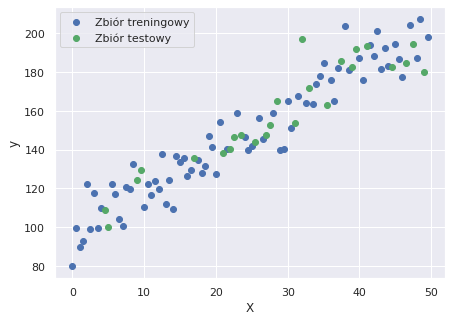

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

plt.figure(figsize = (7, 5))
plt.scatter(X_train, y_train, c ='b', label = 'Zbiór treningowy')
plt.scatter(X_test, y_test, c ='g', label = 'Zbiór testowy')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()


In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# intercept_ - wartość wyrazu wolnego
# coef_ wartość wagi

print(lin_reg.coef_)
print(lin_reg.intercept_)


[2.11200322]
97.45159232017691


In [0]:
# czyli rozwiązanie to: Y = 97.45 + 2.11 * x1

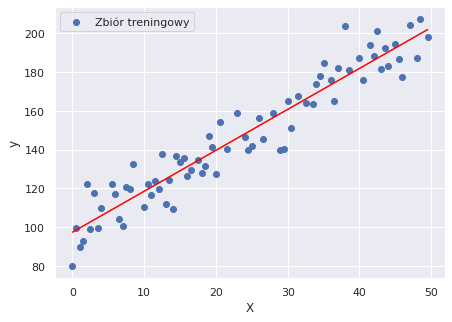

In [14]:
#Wizualizacja zbioru treningowego i dopasowanego modelu

plt.figure(figsize = (7, 5))
plt.scatter(X_train, y_train, c ='b', label = 'Zbiór treningowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X,  c ='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

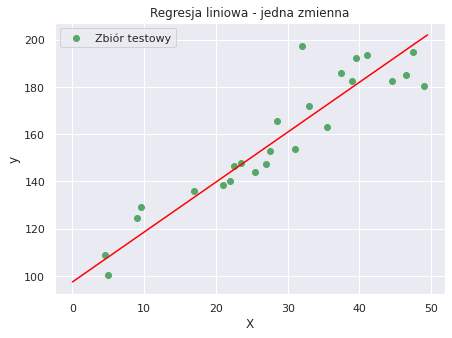

In [17]:
#Wizualizacja zbioru testowego i dopasowanego modelu
y_pred = lin_reg.predict(X_test)
plt.figure(figsize = (7, 5))
plt.title('Regresja liniowa - jedna zmienna')
plt.scatter(X_test, y_test, c ='g', label = 'Zbiór testowy')
plt.plot(X, lin_reg.intercept_ + lin_reg.coef_[0] * X,  c ='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

In [0]:
# ocena modelu

# metoda score zwraca współczynnik determinacji R2 nasej predykcji

In [26]:
lin_reg.score(X_test, y_test)

0.855447115574928